In [1]:
import sklearn
import numpy as np     
import csv 
import copy 
import random 
import pandas as pd
import pickle
import json  
import openpyxl
import itertools
import seaborn as sns

# Torch specific module imports
import torch

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [2]:
def plot_single_initialData_GP():
    # Plots for single runs
    test_size_vector = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    print(mse_gp0)
    print(mse_gpLinear)
    print(mse_gpnn)

    ax1.plot(test_size_vector,mse_gp0, label='GP-0 Mean')
    ax1.plot(test_size_vector,mse_gpLinear, label='GP-Linear Mean')
    ax1.plot(test_size_vector,mse_gpnn, label='GP-NN Mean')
    ax1.set_xlabel('Fraction of Test data')
    ax1.set_ylabel('MSE Loss')
    # plt.legend()
    fig.legend(loc='center')

    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([0.2,0.4,0.6,0.8])
    ax2.set_xticklabels(['0.8','0.6','0.4','0.2'])
    ax2.set_xlabel('Fraction of Training data')

    plt.show()
    
def plot_several_initialData_GP():    
    test_size_vector = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()

    ax1.plot(test_size_vector,gp0_mean, label='GP-0 Mean')
    ax1.fill_between(test_size_vector, gp0_std_plot1, gp0_std_plot2, alpha=0.5)
    ax1.plot(test_size_vector,gpLinear_mean, label='GP-Linear Mean')
    ax1.fill_between(test_size_vector, gpLinear_std_plot1, gpLinear_std_plot2, alpha=0.5)
    ax1.plot(test_size_vector,gpnn_mean, label='GP-NN Mean')
    ax1.fill_between(test_size_vector, gpnn_std_plot1, gpnn_std_plot2, alpha=0.5)
    ax1.set_xlabel('Fraction of Test data')
    ax1.set_ylabel('MSE Loss')
    # plt.legend()
    fig.legend(loc='center')

    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([0.2,0.4,0.6,0.8])
    ax2.set_xticklabels(['0.8','0.6','0.4','0.2'])
    ax2.set_xlabel('Fraction of Training data')

    plt.show()


## Connor Plots

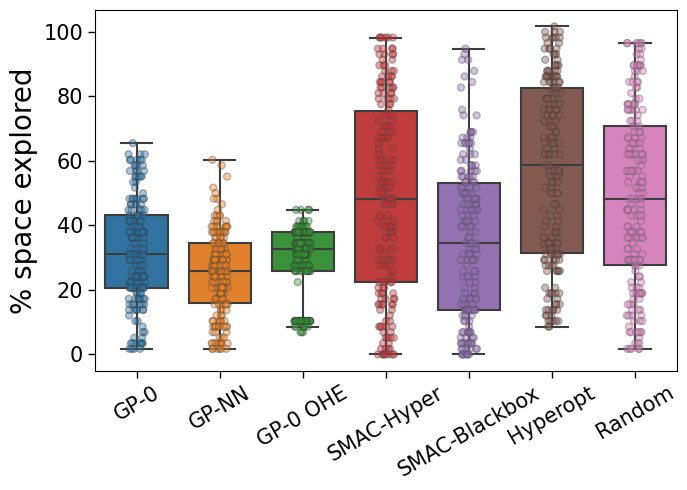

In [8]:
n_trials = 190
total_num_materials = 58
percent_initial_data = 0.0

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/Paper_PAL/paper_connor_0.9p_Run1/'
file1 = output_folder + 'gp0.csv'
file2 = output_folder + 'gpL.csv'
file3 = output_folder + 'gpNN.csv'

gp0 = pd.read_csv(file1)
gpL = pd.read_csv(file2)
gpNN = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/benchmark_paper_results/chan_0.9p_Run1/'
file1 = output_folder + 'gp0.csv'
gpOHE = pd.read_csv(file1)

ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/benchmark_paper_results/dict_other_runs_connor.json'
with open(ps_file, "r") as f:
    ps_dict = json.load(f)

ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/benchmark_paper_results/dict_runs_connor.json'
with open(ps_file, "r") as f:
    ps_dict3 = json.load(f)

ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/../PAL_Search/output/connor_data.json'
with open(ps_file, "r") as f:
    ps_dict2 = json.load(f)

iter_to_reach_max_gp0 = []
iter_to_reach_max_gpL = []
iter_to_reach_max_gpNN = []

for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpL_column_name = 'gpL_trial' + str(trial) 
    gpNN_column_name = 'gpNN_trial' + str(trial) 
    
    iter_to_reach_max_gp0.append((np.argmax(gp0[gp0_column_name].to_numpy()))/total_num_materials*100.0)
    iter_to_reach_max_gpL.append((np.argmax(gpL[gpL_column_name].to_numpy()))/total_num_materials*100.0)
    iter_to_reach_max_gpNN.append((np.argmax(gpNN[gpNN_column_name].to_numpy()))/total_num_materials*100.0)
    

iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpL,  iter_to_reach_max_gpNN]  
method_list= ['GP-0', 'GP-L', 'GP-NN']

iter_to_reach_max_gp0 = []
iter_to_reach_max_gpNN = []
iter_to_reach_max_smac_hyper = []
iter_to_reach_max_smac_blackbox = []
iter_to_reach_max_hyperopt = []
iter_to_reach_max_ohe = ps_dict2['connor']['naive']
iter_to_reach_max_random = ps_dict2['connor']['random'][0:190]

for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpNN_column_name = 'gpNN_trial' + str(trial) 
    
    iter_to_reach_max_gp0.append((np.argmax(gp0[gp0_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_gpNN.append((np.argmax(gpNN[gpNN_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_smac_hyper.append((np.argmax(ps_dict['smac_hyper'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_smac_blackbox.append((np.argmax(ps_dict['smac_blackbox'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_hyperopt.append((np.argmax(ps_dict['hyperopt'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    # iter_to_reach_max_ohe.append((np.argmax(ps_dict3['ohe'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    # iter_to_reach_max_random.append((np.argmax(ps_dict2['random'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)

iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpNN, iter_to_reach_max_ohe,
                     iter_to_reach_max_smac_hyper, iter_to_reach_max_smac_blackbox, 
                     iter_to_reach_max_hyperopt, iter_to_reach_max_random]  
method_list= ['GP-0', 'GP-NN', 'GP-0 OHE','SMAC-Hyper', 'SMAC-Blackbox', 'Hyperopt', 'Random']

# iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpNN]  
# method_list= ['GP-0', 'GP-NN']

df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')


fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.75)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((-0.05, 1.05))
plt.gcf().set_size_inches((7,5))
# plt.title(f'k = {k}')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('% space explored', fontsize=20);

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=30)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/figures/connor.pdf', bbox_inches='tight')


## Chan results

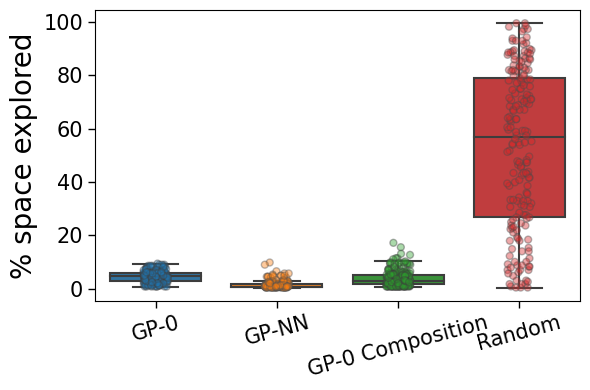

In [25]:
n_trials = 190
total_num_materials = 244
percent_initial_data = 0.0

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/Paper_PAL/paper_chan_0.9p_Run1/'
file1 = output_folder + 'gp0.csv'
file2 = output_folder + 'gpL.csv'
file3 = output_folder + 'gpNN.csv'

gp0 = pd.read_csv(file1)
gpL = pd.read_csv(file2)
gpNN = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/benchmark_paper_results/chan_0.9p_Run1/'
file1 = output_folder + 'gp0.csv'
gpOHE = pd.read_csv(file1)


ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/../PAL_Search/output/henry_data.json'
with open(ps_file, "r") as f:
    ps_dict2 = json.load(f)

iter_to_reach_max_gp0 = []
iter_to_reach_max_gpNN = []
iter_to_reach_max_gpOHE = []
iter_to_reach_max_random = ps_dict2['henry']['random'][0:190]

for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpOHE_column_name = 'gp0_trial' + str(trial)
    gpNN_column_name = 'gpNN_trial' + str(trial) 
    
    iter_to_reach_max_gp0.append((np.argmax(gp0[gp0_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_gpNN.append((np.argmax(gpNN[gpNN_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_gpOHE.append((np.argmax(gpOHE[gpOHE_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    # iter_to_reach_max_random.append((np.argmax(ps_dict2['henry']['random'][0:100]))/total_num_materials*100.0+percent_initial_data)
    
iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpNN, iter_to_reach_max_gpOHE, iter_to_reach_max_random]  
method_list= ['GP-0', 'GP-NN', 'GP-0 Composition', 'Random']

df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')


fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.75)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((-0.05, 1.05))
plt.gcf().set_size_inches((6,4))
# plt.title(f'k = {k}')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('% space explored', fontsize=20);

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=15)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
# plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/figures/chan_zoomed.pdf', bbox_inches='tight')


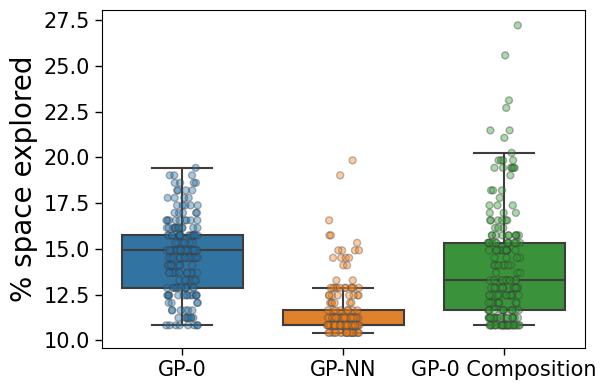

In [23]:
iter_to_reach_max_gp0 = []
iter_to_reach_max_gpNN = []
iter_to_reach_max_gpOHE = []
iter_to_reach_max_random = ps_dict2['henry']['random'][0:198]

for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpOHE_column_name = 'gp0_trial' + str(trial)
    gpNN_column_name = 'gpNN_trial' + str(trial) 
    
    iter_to_reach_max_gp0.append((np.argmax(gp0[gp0_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_gpNN.append((np.argmax(gpNN[gpNN_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_gpOHE.append((np.argmax(gpOHE[gpOHE_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    # iter_to_reach_max_random.append((np.argmax(ps_dict2['random'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    
iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpNN, iter_to_reach_max_gpOHE] #, iter_to_reach_max_random]  
method_list= ['GP-0', 'GP-NN', 'GP-0 Composition'] #, 'Random']

# iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpNN]  
# method_list= ['GP-0', 'GP-NN']

df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')


fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.75)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((-0.05, 1.05))
plt.gcf().set_size_inches((6,4))
# plt.title(f'k = {k}')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('% space explored', fontsize=20);

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=0)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/figures/chan_zoomed.pdf', bbox_inches='tight')


## Henry's Plots

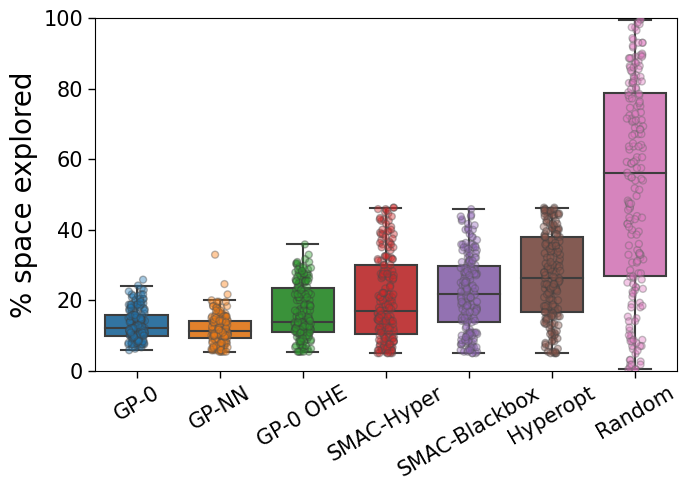

In [26]:
n_trials = 187
total_num_materials = 240
percent_initial_data = 5.0

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/Paper_PAL/paper_henry_0.95p_Run7/'
file1 = output_folder + 'gp0.csv'
file2 = output_folder + 'gpL.csv'
file3 = output_folder + 'gpNN.csv'

gp0 = pd.read_csv(file1)
gpL = pd.read_csv(file2)
gpNN = pd.read_csv(file3)

ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/benchmark_paper_results/dict_other_runs_henry.json'
with open(ps_file, "r") as f:
    ps_dict = json.load(f)

ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/benchmark_paper_results/dict_runs_henry.json'
with open(ps_file, "r") as f:
    ps_dict3 = json.load(f)

ps_file = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/../PAL_Search/output/henry_data.json'
with open(ps_file, "r") as f:
    ps_dict2 = json.load(f)
    
iter_to_reach_max_gp0 = []
iter_to_reach_max_gpNN = []
iter_to_reach_max_smac_hyper = []
iter_to_reach_max_smac_blackbox = []
iter_to_reach_max_hyperopt = []
iter_to_reach_max_ohe = [] #ps_dict2['henry']['naive'][0:n_trials]
iter_to_reach_max_random = ps_dict2['henry']['random'][0:n_trials]

for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpNN_column_name = 'gpNN_trial' + str(trial) 
    
    iter_to_reach_max_gp0.append((np.argmax(gp0[gp0_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_gpNN.append((np.argmax(gpNN[gpNN_column_name].to_numpy()))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_smac_hyper.append((np.argmax(ps_dict['smac_hyper'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_smac_blackbox.append((np.argmax(ps_dict['smac_blackbox'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_hyperopt.append((np.argmax(ps_dict['hyperopt'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)
    iter_to_reach_max_ohe.append((np.argmax(ps_dict3['ohe'][str(trial)][0:100]))/total_num_materials*100.0+percent_initial_data)

iter_to_reach_max = [iter_to_reach_max_gp0, iter_to_reach_max_gpNN, iter_to_reach_max_ohe,
                     iter_to_reach_max_smac_hyper, iter_to_reach_max_smac_blackbox, 
                     iter_to_reach_max_hyperopt, iter_to_reach_max_random]  
method_list= ['GP-0', 'GP-NN', 'GP-0 OHE','SMAC-Hyper', 'SMAC-Blackbox', 'Hyperopt', 'Random']


df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')


fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.75)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

ax.set_ylim((0, 100))
plt.gcf().set_size_inches((7,5))
# plt.title(f'k = {k}')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('% space explored', fontsize=20);

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=30)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
# plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/figures/henry.pdf', bbox_inches='tight')


## Chan varying initial dataset stress test

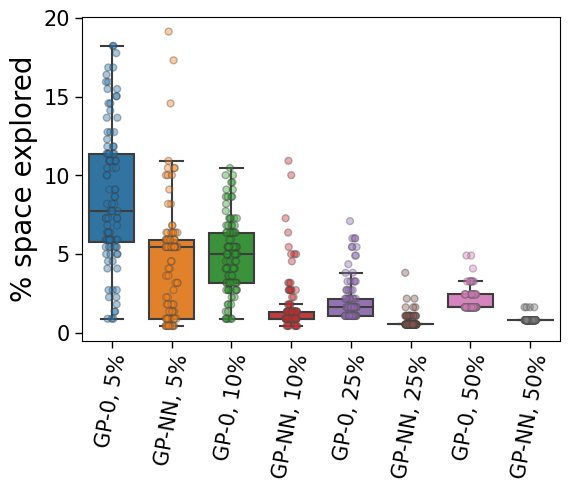

In [34]:
n_trials = 100
total_num_materials = 244
percent_initial_data = 0.0

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/paper_revision_chan_0.95p_Run1/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_95 = pd.read_csv(file1)
gpNN_95 = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/Paper_PAL/paper_chan_0.9p_Run1/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_90 = pd.read_csv(file1)
gpNN_90 = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/paper_revision_chan_0.75p_Run1/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_75 = pd.read_csv(file1)
gpNN_75 = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/paper_revision_chan_0.5p_Run1/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_50 = pd.read_csv(file1)
gpNN_50 = pd.read_csv(file3)


iter_to_reach_max_gp0_95 = []
iter_to_reach_max_gpNN_95 = []
iter_to_reach_max_gp0_90 = []
iter_to_reach_max_gpNN_90 = []
iter_to_reach_max_gp0_75 = []
iter_to_reach_max_gpNN_75 = []
iter_to_reach_max_gp0_50 = []
iter_to_reach_max_gpNN_50 = []



for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpOHE_column_name = 'gp0_trial' + str(trial)
    gpNN_column_name = 'gpNN_trial' + str(trial) 
    
    iter_to_reach_max_gp0_95.append((np.argmax(gp0_95[gp0_column_name].to_numpy()))/(0.9*total_num_materials)*100.0) #+10.0)
    iter_to_reach_max_gpNN_95.append((np.argmax(gpNN_95[gpNN_column_name].to_numpy()))/(0.9*total_num_materials)*100.0) #+10.0)
    iter_to_reach_max_gp0_90.append((np.argmax(gp0_90[gp0_column_name].to_numpy()))/(0.9*total_num_materials)*100.0) #+10.0)
    iter_to_reach_max_gpNN_90.append((np.argmax(gpNN_90[gpNN_column_name].to_numpy()))/(0.9*total_num_materials)*100.0) #+10.0)
    iter_to_reach_max_gp0_75.append((np.argmax(gp0_75[gp0_column_name].to_numpy()))/(0.75*total_num_materials)*100.0) #+25.0)
    iter_to_reach_max_gpNN_75.append((np.argmax(gpNN_75[gpNN_column_name].to_numpy()))/(0.75*total_num_materials)*100.0) #+25.0)
    iter_to_reach_max_gp0_50.append((np.argmax(gp0_50[gp0_column_name].to_numpy()))/(0.50*total_num_materials)*100.0) #+50.0)
    iter_to_reach_max_gpNN_50.append((np.argmax(gpNN_50[gpNN_column_name].to_numpy()))/(0.50*total_num_materials)*100.0) #+50.0)

    
iter_to_reach_max = [iter_to_reach_max_gp0_95, iter_to_reach_max_gpNN_95,
                     iter_to_reach_max_gp0_90, iter_to_reach_max_gpNN_90,
                     iter_to_reach_max_gp0_75, iter_to_reach_max_gpNN_75,
                     iter_to_reach_max_gp0_50, iter_to_reach_max_gpNN_50]
method_list= ['GP-0, 5%', 'GP-NN, 5%','GP-0, 10%', 'GP-NN, 10%',
              'GP-0, 25%','GP-NN, 25%','GP-0, 50%', 'GP-NN, 50%']

df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')


fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.75)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

# ax.set_ylim((-0.05, 1.05))
plt.gcf().set_size_inches((6,5))
# plt.title(f'k = {k}')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('% space explored', fontsize=20);

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=80)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/figures/stress_test_chan.pdf', bbox_inches='tight')


## Henry varying initial dataset stress test

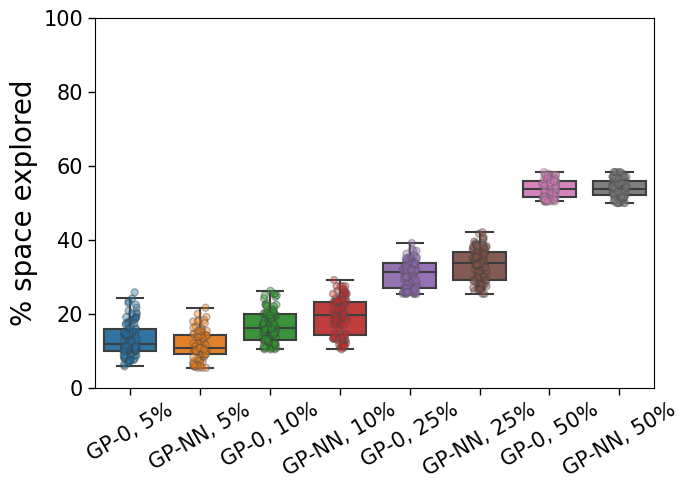

In [8]:
n_trials = 100
total_num_materials = 240
percent_initial_data = 5.0

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/Paper_PAL/paper_henry_0.95p_Run7/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_95 = pd.read_csv(file1)
gpNN_95 = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/paper_revision_henry_0.9p_Run7/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_90 = pd.read_csv(file1)
gpNN_90 = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/paper_revision_henry_0.75p_Run7/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_75 = pd.read_csv(file1)
gpNN_75 = pd.read_csv(file3)

output_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/paper_revision_henry_0.5p_Run7/'
file1 = output_folder + 'gp0.csv'
file3 = output_folder + 'gpNN.csv'

gp0_50 = pd.read_csv(file1)
gpNN_50 = pd.read_csv(file3)

    
iter_to_reach_max_gp0_95 = []
iter_to_reach_max_gpNN_95 = []
iter_to_reach_max_gp0_90 = []
iter_to_reach_max_gpNN_90 = []
iter_to_reach_max_gp0_75 = []
iter_to_reach_max_gpNN_75 = [] 
iter_to_reach_max_gp0_50 = []
iter_to_reach_max_gpNN_50 = [] 

for trial in range(1,n_trials+1):
    gp0_column_name = 'gp0_trial' + str(trial)
    gpNN_column_name = 'gpNN_trial' + str(trial)     
    
    iter_to_reach_max_gp0_95.append((np.argmax(gp0_95[gp0_column_name].to_numpy()))/total_num_materials*100.0+5.0)
    iter_to_reach_max_gpNN_95.append((np.argmax(gpNN_95[gpNN_column_name].to_numpy()))/total_num_materials*100.0+5.0)
    iter_to_reach_max_gp0_90.append((np.argmax(gp0_90[gp0_column_name].to_numpy()))/total_num_materials*100.0+10.0)
    iter_to_reach_max_gpNN_90.append((np.argmax(gpNN_90[gpNN_column_name].to_numpy()))/total_num_materials*100.0+10.0)
    iter_to_reach_max_gp0_75.append((np.argmax(gp0_75[gp0_column_name].to_numpy()))/total_num_materials*100.0+25.0)
    iter_to_reach_max_gpNN_75.append((np.argmax(gpNN_75[gpNN_column_name].to_numpy()))/total_num_materials*100.0+25.0)
    iter_to_reach_max_gp0_50.append((np.argmax(gp0_50[gp0_column_name].to_numpy()))/total_num_materials*100.0+50.0)
    iter_to_reach_max_gpNN_50.append((np.argmax(gpNN_50[gpNN_column_name].to_numpy()))/total_num_materials*100.0+50.0)
    
iter_to_reach_max = [iter_to_reach_max_gp0_95, iter_to_reach_max_gpNN_95,
                    iter_to_reach_max_gp0_90, iter_to_reach_max_gpNN_90,
                    iter_to_reach_max_gp0_75, iter_to_reach_max_gpNN_75,
                    iter_to_reach_max_gp0_50, iter_to_reach_max_gpNN_50,]  
method_list= ['GP-0, 5%', 'GP-NN, 5%','GP-0, 10%', 'GP-NN, 10%',
              'GP-0, 25%','GP-NN, 25%','GP-0, 50%', 'GP-NN, 50%']


df_data = pd.DataFrame({x: y for x, y in zip(method_list, iter_to_reach_max)})
df_plot = pd.melt(df_data, value_vars=method_list, var_name='method')


fig, ax = plt.subplots(1,1)
ax = sns.boxplot(x='method', y='value', data=df_plot, showfliers = False, width=0.75)
ax = sns.stripplot(x='method', y='value', data=df_plot, hue='method', legend=False,
                   alpha=.4, linewidth=1, jitter=0.1)

ax.set_ylim((0, 100))
plt.gcf().set_size_inches((7,5))
# plt.title(f'k = {k}')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('% space explored', fontsize=20);

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=15, rotation=30)
# plt.gca().set_xticklabels(['25 X 25', '50 X 50'], fontsize=20)

plt.tight_layout()
fig.patch.set_facecolor('white')
# plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/MatDisc_ML/bo_output/figures/varying_initial_data_stressTest.pdf', bbox_inches='tight')
